In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('data.csv')

In [2]:
from sklearn import metrics
def print_metrics(pred, y_vals):
    print('mape: ', metrics.mean_absolute_percentage_error(y_vals, pred))
    print('mae: ', metrics.mean_absolute_error(y_vals, pred))
    print('mse: ', metrics.mean_squared_error(y_vals, pred))
    print('rmse: ', np.sqrt(metrics.mean_squared_error(y_vals, pred)))
    print('r2: ', metrics.r2_score(y_vals, pred))
    count = 0
    y_error = pred.flatten() - y_vals.flatten()
    y_error = np.array([abs(e) for e in y_error]).flatten()
    for i in range(len(y_error)):
        if(y_error[i] < 0.25 * y_vals[i]):
            count += 1
    print('25% 准确度: ', count / len(pred))

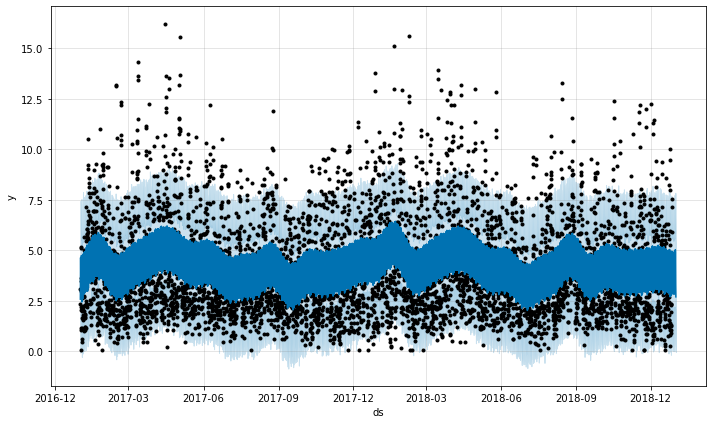

In [3]:
from prophet import Prophet
split_line=5800
df = pd.DataFrame(data['ds'][:split_line])
df['y'] = data['wind'][:split_line]
m = Prophet(changepoint_prior_scale=1.0, seasonality_prior_scale=0.1, seasonality_mode='additive', changepoint_range=1, yearly_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=len(data['ds'])-split_line, freq='3H')
forecast = m.predict(future)
fig = m.plot(forecast)
fig.savefig("prophet_wind.pdf")

In [4]:
print_metrics(forecast['yhat'][:split_line].to_numpy(), data['wind'][:split_line].to_numpy())

mape:  0.811048306594047
mae:  1.669410108638486
mse:  4.676397471905323
rmse:  2.1624979703817813
r2:  0.1546359378992639
25% 准确度:  0.35551724137931034


In [5]:
print_metrics(forecast['yhat'][split_line:].to_numpy(), data['wind'][split_line:].to_numpy())

mape:  2.522744872767091
mae:  2.6564272378571574
mse:  9.33855940705612
rmse:  3.055905660693098
r2:  0.018022380116612946
25% 准确度:  0.125


In [6]:
wind_iceemdan = pd.read_csv('wind.csv')
forecasted=[]
for index in wind_iceemdan.columns:
    if index == 'ds' or index == 'orig':
        continue
    temp_df = pd.DataFrame(wind_iceemdan['ds'][:split_line])
    temp_df['y'] = wind_iceemdan[index][:split_line]
    m = Prophet(changepoint_prior_scale=1.0, seasonality_prior_scale=0.1, seasonality_mode='additive', changepoint_range=1, yearly_seasonality=True)
    m.fit(temp_df)
    future = m.make_future_dataframe(periods=len(wind_iceemdan['ds'])-split_line, freq='3H')
    forecast = m.predict(future)
    forecasted.append(forecast['yhat'].to_numpy().ravel())
import copy
result = copy.deepcopy(forecasted[0])
for i in range(1, len(forecasted)):
    result += forecasted[i]

In [7]:
print_metrics(result[:split_line], data['wind'][:split_line].to_numpy())

mape:  0.809527314909222
mae:  1.6655091375859066
mse:  4.656702225688189
rmse:  2.157939347082811
r2:  0.15819629679651703
25% 准确度:  0.3618965517241379


In [8]:
print_metrics(result[split_line:], data['wind'][split_line:].to_numpy())

mape:  2.3742597319466796
mae:  2.6359652010737884
mse:  9.447325374405096
rmse:  3.073650171116599
r2:  0.006585311390470916
25% 准确度:  0.125
